In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, scale
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from matplotlib.image import imread

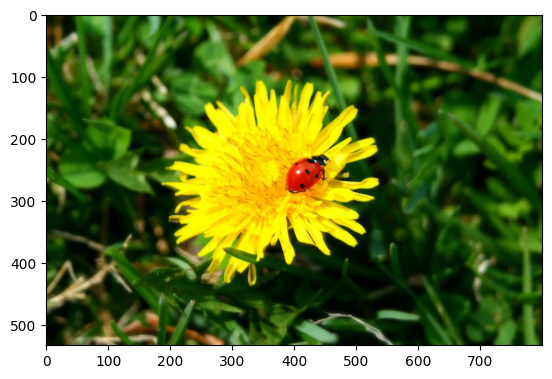

In [4]:
image = imread('../../00.Data/07.ML/data/ladybug.png')
image.shape
plt.imshow(image)

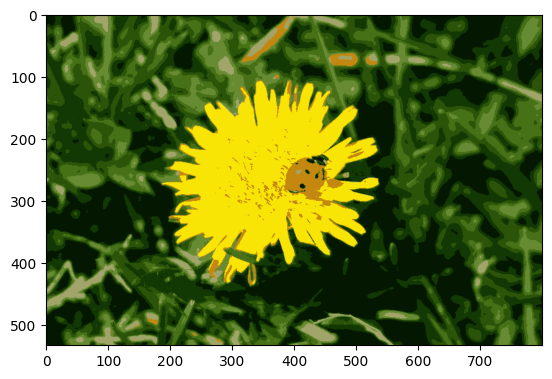

In [6]:
x = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8, random_state=14).fit(x)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)
plt.imshow(segmented_img)

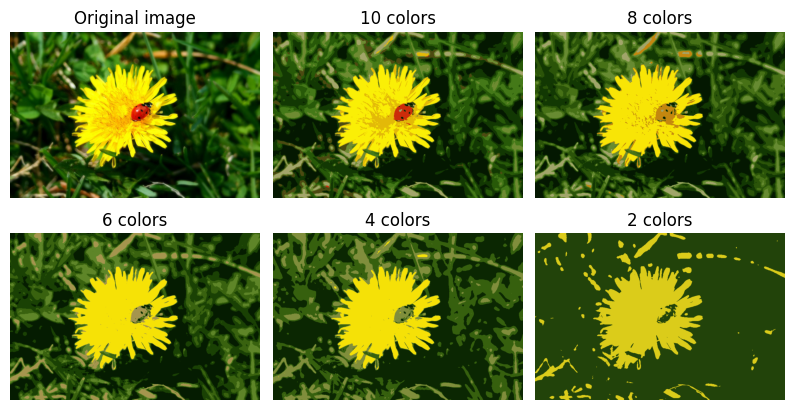

In [8]:
segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors :
    kmeans = KMeans(n_clusters=n_clusters, random_state=14).fit(x)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(231)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors) :
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx])
    plt.title("{} colors".format(n_clusters))
    plt.axis('off')

plt.show()

In [11]:
x_digits, y_digits = load_digits(return_X_y = True)
x_train, x_test, y_train, y_test = train_test_split(x_digits, y_digits, random_state=14)

In [13]:
log_reg = LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=5000, random_state=14)
log_reg.fit(x_train, y_train)

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=14)

In [14]:
log_reg.score(x_test, y_test)

0.9688888888888889

In [16]:
pipeline = Pipeline([("kmeans", KMeans(n_clusters=50, random_state=14)), ("log_reg", LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=5000, random_state=14)),])
pipeline.fit(x_train, y_train)

Pipeline(steps=[('kmeans', KMeans(n_clusters=50, random_state=14)),
                ('log_reg',
                 LogisticRegression(max_iter=5000, multi_class='ovr',
                                    random_state=14))])

In [17]:
pipeline.score(x_test, y_test)

0.9733333333333334

In [18]:
param_grid = dict(kmeans__n_clusters=range(2,100))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid_clf.fit(x_train, y_train)

Fitting 3 folds for each of 98 candidates, totalling 294 fits
[CV] END ...............................kmeans__n_clusters=2; total time=   0.2s
[CV] END ...............................kmeans__n_clusters=2; total time=   0.2s
[CV] END ...............................kmeans__n_clusters=2; total time=   0.2s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.2s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.2s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.2s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.2s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.2s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.2s
[CV] END ...............................kmeans__n_clusters=5; total time=   0.3s
[CV] END ...............................kmeans__n_clusters=5; total time=   0.2s
[CV] END ...............................kmeans_

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kmeans',
                                        KMeans(n_clusters=50, random_state=14)),
                                       ('log_reg',
                                        LogisticRegression(max_iter=5000,
                                                           multi_class='ovr',
                                                           random_state=14))]),
             param_grid={'kmeans__n_clusters': range(2, 100)}, verbose=2)

In [19]:
grid_clf.best_params_

{'kmeans__n_clusters': 76}

In [21]:
grid_clf.score(x_test, y_test)

0.98